# Setting up YOLOv8

In [9]:
import yaml
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
# # Copying files to working directory
# List all files to debug structure
for root, dirs, files in os.walk('/kaggle/input/german-traffic-sign-detection-benchmark'):
    print(f"Directory: {root}")
    print(f"Subfolders: {dirs}")
    print(f"Files: {files}\n")

# Copy dataset to writable location
shutil.copytree(
    '/kaggle/input/german-traffic-sign-detection-benchmark',
    '/kaggle/working/dataset'
)

Directory: /kaggle/input/german-traffic-sign-detection-benchmark
Subfolders: ['valid', 'test', 'train']
Files: ['README.roboflow.txt', 'data.yaml']

Directory: /kaggle/input/german-traffic-sign-detection-benchmark/valid
Subfolders: ['labels', 'images']
Files: []

Directory: /kaggle/input/german-traffic-sign-detection-benchmark/valid/labels
Subfolders: []
Files: ['67_jpg.rf.6e7cc2794563f99c97992ea9b765baa7.txt', '25_jpg.rf.9cf00d4dbe777e667e0a4ea4f99bb7d2.txt', '44_jpg.rf.866f57f858c76239833a3afa13df1465.txt', '60_jpg.rf.7748553ff2195f875eae9288fdd65fbe.txt', '228_jpg.rf.ab744c1c799dc724fca01d1b5ab4973c.txt', '297_jpg.rf.45e4e5f9ccffbcd5af03763fddbe4e43.txt', '65_jpg.rf.80711a0449232df780e4f70291fd6c91.txt', '62_jpg.rf.62763ffd090c83a2782290c25a5b6b41.txt', '54_jpg.rf.dda061d2322372afd8e0d0e9e63f4918.txt', '3_jpg.rf.12636af3e2b079371be17576341c11a0.txt', '53_jpg.rf.0a67c14b65fa88e9764f43fd58e45baa.txt', '82_jpg.rf.b362fad39f3e1b675e8841713a3e5790.txt', '82_jpg.rf.9c509abf962a3e7941904e7

'/kaggle/working/dataset'

# Conversion of annotations in labels (as we are only identifying whether object is a road sign or not)

In [11]:
yaml_path = "/kaggle/input/german-traffic-sign-detection-benchmark/data.yaml"
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Modify values 
data["train"] = "/kaggle/working/dataset/train/images"
data["val"] = "/kaggle/working/dataset/valid/images"
data["nc"] = 1
data["names"] = ['road_sign'] 

# Save the modified YAML
with open("new_data.yaml", 'w+') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Updated data.yaml saved as new_data.yaml!")

Updated data.yaml saved as new_data.yaml!


In [12]:
def convert_labels_to_binary(root_dir):
    for split in ['train', 'valid']: 
        labels_dir = os.path.join(root_dir, split, 'labels')
        print(f"Processing {labels_dir}...")
        
        for filename in os.listdir(labels_dir):
            if filename.endswith('.txt'):
                filepath = os.path.join(labels_dir, filename)
                
                with open(filepath, 'r') as f:
                    lines = f.readlines()
                
                new_lines = []
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) >= 5:  # Ensure valid YOLO format
                        parts[0] = '0'  
                        new_lines.append(" ".join(parts) + "\n")
                
                with open(filepath, 'w') as f:
                    f.writelines(new_lines)

# Path to working directory
dataset_root = '/kaggle/working/dataset'
convert_labels_to_binary(dataset_root)

Processing /kaggle/working/dataset/train/labels...
Processing /kaggle/working/dataset/valid/labels...


In [8]:
# # Checking the changes
# !head -n 3 /kaggle/working/dataset/valid/labels/*.txt

# Training our model

In [13]:
model = YOLO('yolov8n.pt')

model.train(
    data='/kaggle/working/new_data.yaml',
    epochs=40,
    imgsz=640,
    batch=32,
    name='road_sign_detector',
    workers=2,
    patience=7
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 114MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/new_data.yaml, epochs=40, time=None, patience=7, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=road_sign_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 26.9MB/s]
E0000 00:00:1744405874.859020      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744405874.912841      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 117MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train/labels... 788 images, 0 backgrounds, 0 corrupt: 100%|██████████| 788/788 [00:00<00:00, 1484.71it/s]

train: New cache created: /kaggle/working/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/dataset/valid/labels... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<00:00, 1406.24it/s]

val: New cache created: /kaggle/working/dataset/valid/labels.cache


Plotting labels to runs/detect/road_sign_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/road_sign_detector
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.78G      2.186      3.806      1.415         41        640: 100%|██████████| 25/25 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        218        350    0.00417       0.78     0.0229    0.00589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      4.27G       1.84      2.303      1.237         34        640: 100%|██████████| 25/25 [00:08<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        218        350      0.628      0.234      0.328      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      4.27G      1.775      1.939      1.214         33        640: 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        218        350     0.0275      0.194     0.0204    0.00819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      4.28G      1.773      1.762      1.194         60        640: 100%|██████████| 25/25 [00:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


                   all        218        350      0.889     0.0914      0.225        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      4.28G      1.775      1.589      1.222         45        640: 100%|██████████| 25/25 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        218        350      0.671      0.611      0.592      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      4.28G      1.773      1.479      1.218         40        640: 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        218        350       0.67        0.6      0.617      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      4.28G      1.715      1.358      1.192         52        640: 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        218        350      0.776      0.723      0.755      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      4.28G      1.719      1.268      1.215         36        640: 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]


                   all        218        350      0.735      0.606      0.663      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      4.28G      1.729      1.238       1.22         63        640: 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        218        350      0.832      0.653      0.729      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      4.28G      1.664      1.169      1.159         60        640: 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        218        350      0.778       0.68      0.706      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      4.28G      1.653      1.157      1.172         54        640: 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        218        350      0.857      0.717      0.767      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      4.28G       1.64       1.09      1.154         42        640: 100%|██████████| 25/25 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all        218        350      0.889      0.732      0.809      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      4.28G      1.666      1.094      1.165         48        640: 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        218        350      0.837      0.709      0.799      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      4.28G      1.601      1.079      1.147         42        640: 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]


                   all        218        350      0.843      0.754      0.811      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      4.28G      1.627      1.015      1.147         33        640: 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        218        350      0.897      0.711      0.818        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      4.28G      1.584     0.9883      1.148         45        640: 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        218        350      0.863      0.729      0.807      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      4.28G        1.6      1.007      1.151         51        640: 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        218        350      0.879       0.72      0.799      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      4.28G      1.548     0.9851      1.117         62        640: 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]


                   all        218        350      0.832      0.767      0.817      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      4.28G      1.515     0.9498       1.12         39        640: 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        218        350      0.901      0.726      0.807      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      4.28G      1.565     0.9118      1.124         35        640: 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]


                   all        218        350      0.846      0.777      0.823      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      4.28G      1.542     0.9002      1.107         42        640: 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        218        350      0.914      0.791      0.862      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      4.28G      1.485     0.8736       1.11         48        640: 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        218        350      0.868      0.794      0.832      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      4.28G      1.498     0.8503      1.097         37        640: 100%|██████████| 25/25 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        218        350      0.908      0.797      0.865      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      4.28G      1.486     0.8664      1.096         44        640: 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all        218        350      0.883      0.776      0.836       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      4.28G      1.471     0.8209      1.103         43        640: 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        218        350      0.901       0.78      0.838      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      4.28G      1.486     0.8223      1.096         35        640: 100%|██████████| 25/25 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        218        350      0.908      0.787      0.844      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      4.28G      1.458     0.8129       1.09         46        640: 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        218        350      0.869      0.769      0.813      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      4.28G      1.482     0.7819      1.104         46        640: 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        218        350      0.873      0.806      0.852      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      4.28G      1.424     0.7845      1.075         41        640: 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


                   all        218        350      0.871      0.794      0.838      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      4.28G      1.443     0.7869      1.074         58        640: 100%|██████████| 25/25 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


                   all        218        350      0.888      0.791      0.846      0.397
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 23, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

30 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/road_sign_detector/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/road_sign_detector/weights/best.pt, 6.2MB

Validating runs/detect/road_sign_detector/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


                   all        218        350      0.908      0.797      0.865      0.406


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/road_sign_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf4ab473110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Evaluating on validation accuracy

In [14]:
model = YOLO('/kaggle/working/runs/detect/road_sign_detector/weights/best.pt')

# Evaluate on validation set
metrics = model.val(data='/kaggle/working/dataset/data.yaml', split='val')

# Access metrics
print("\n📊 YOLOv8 Evaluation Results:")
print(f"mAP@0.5     : {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision   : {metrics.box.p[0]:.4f}")
print(f"Recall      : {metrics.box.r[0]:.4f}")

Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/dataset/valid/labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.70it/s]


                   all        218        350      0.912        0.8      0.868      0.406


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.5ms preprocess, 3.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val

📊 YOLOv8 Evaluation Results:
mAP@0.5     : 0.8681
mAP@0.5:0.95: 0.4064
Precision   : 0.9115
Recall      : 0.8000


# Evaluation on single predictionss


0: 640x640 2 road_signs, 6.6ms
Speed: 2.7ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
✅ Detected 2 road sign(s) in the image.


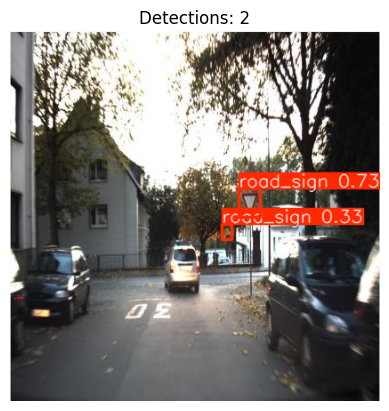

In [19]:
image_path = "/kaggle/working/dataset/test/images/102_jpg.rf.da7ba993bf9e9010560f73ec5ef778c6.jpg" 

# Read the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Loading model
model = YOLO('/kaggle/working/runs/detect/road_sign_detector/weights/best.pt')
# Run detection
results = model(img_rgb)[0]

# Check if any sign is detected
num_detections = len(results.boxes)

if num_detections > 0:
    print(f"✅ Detected {num_detections} road sign(s) in the image.")
else:
    print("❌ No road sign detected.")

# Optional: visualize result with bounding boxes
plt.imshow(results.plot())
plt.axis('off')
plt.title(f"Detections: {num_detections}")
plt.show()

# Saving models for rover

In [51]:
model.export(format='tflite')

Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/road_sign_detector/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 2.2s, saved as 'runs/detect/road_sign_detector/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.1...


E0000 00:00:1744402188.616114     137 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1744402189.100228     137 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1744402189.459654     137 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and 

TensorFlow SavedModel: export success ✅ 33.0s, saved as 'runs/detect/road_sign_detector/weights/best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (33.3s)
Results saved to /kaggle/working/runs/detect/road_sign_detector/weights
Predict:         yolo predict task=detect model=runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/new_data.yaml  
Visualize:       https://netron.app


'runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite'

In [50]:
model.export(format='tflite')


Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/road_sign_detector/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirement ['protobuf>=5'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3

requirements: AutoUpdate success ✅ 13.5s, installed 1 package: ['protobuf>=5']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tflite-support 0.4.4 requires protobuf<4,>=3.18.0, but you have protobuf 6.30.2 which is incompatible.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 6.30.2 which is incompatible.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 6.30.2 which is incompatible.
google-cloud-functions 1.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.2 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 6.30.2 which is incompatible.
google-cloud-iam 2.18.0 requires

ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 2.4s, saved as 'runs/detect/road_sign_detector/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.1...


E0000 00:00:1744401975.956695     137 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1744401976.449549     137 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1744401976.815581     137 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and 

TensorFlow SavedModel: export success ✅ 46.2s, saved as 'runs/detect/road_sign_detector/weights/best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (46.6s)
Results saved to /kaggle/working/runs/detect/road_sign_detector/weights
Predict:         yolo predict task=detect model=runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/new_data.yaml  
Visualize:       https://netron.app


'runs/detect/road_sign_detector/weights/best_saved_model/best_float32.tflite'